<a href="https://colab.research.google.com/github/Sallb679/Github-Portfolio/blob/main/ECON422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#code to mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/ECON 422 Project/ies_2010_2011_house_info_v1.csv'

In [ ]:
#read filepath it is a csv there are multiple files

import pandas as pd
df = pd.read_csv(file_path)


In [ ]:
df.head()

,UQNO,Province,Settlement_type,SurveyYear,SurveyMonth,Hsize,GenderOfHead,PopGrpOfHead,Q110SUPPORTS,Q111PERSSUPPORTED,...,Q151VEHICLEPRIVUSE,Q15141RUNCOSTSPRIV,Q1516DRIVLESSTESTSLIC,Consumptions,ConsumptionDecile,InkindConsumptions,Income,InkindIncome,IncomeDecile,Full_calwgt
0,101000170000000801,1,5,2011,5,3,1,2,2,8,...,4,2,2,22462,3,22462,42319,42319,5,347.939977
1,101000170000002901,1,5,2011,5,4,1,2,2,8,...,4,2,2,11450,1,11450,26928,27088,4,324.718160
2,101000170000005001,1,5,2011,5,1,1,4,2,8,...,4,2,1,66973,7,66973,116502,116502,8,303.991353
3,101000170000007101,1,5,2011,5,2,1,4,1,1,...,2,1,2,626366,10,626366,461552,461552,10,209.472089
4,101000170000011301,1,5,2011,5,2,1,2,2,8,...,4,2,2,22786,3,22786,31394,31394,4,389.868124


In [ ]:
# Select relevant columns for the analysis
columns_of_interest = [
    'UQNO', 'SurveyYear', 'SurveyMonth',  # Key identifiers
    'Income', 'Consumptions',  # Income variables
    'Hsize', 'GenderOfHead', 'PopGrpOfHead'  # Household characteristics
]

# Subset the DataFrame to keep only the relevant columns
df_subset = df[columns_of_interest]

# Further subset the data to only include records for June (SurveyMonth = 6)
df_subset = df_subset[df_subset['SurveyMonth'] == 6]


# Calculate a simple correlation matrix to see relationships between income and consumption
correlation_matrix = df_subset.corr()

# Display correlation matrix
print(correlation_matrix)

# Optionally, save the subset for further analysis
df_subset.to_csv('income_consumption_june.csv', index=False)



                  UQNO  SurveyYear  SurveyMonth    Income  Consumptions  \
UQNO          1.000000         NaN          NaN -0.016940     -0.003500   
SurveyYear         NaN         NaN          NaN       NaN           NaN   
SurveyMonth        NaN         NaN          NaN       NaN           NaN   
Income       -0.016940         NaN          NaN  1.000000      0.736249   
Consumptions -0.003500         NaN          NaN  0.736249      1.000000   
Hsize        -0.022611         NaN          NaN  0.009243      0.044342   
GenderOfHead  0.008043         NaN          NaN -0.169708     -0.148194   
PopGrpOfHead -0.247100         NaN          NaN  0.414892      0.448374   

                 Hsize  GenderOfHead  PopGrpOfHead  
UQNO         -0.022611      0.008043     -0.247100  
SurveyYear         NaN           NaN           NaN  
SurveyMonth        NaN           NaN           NaN  
Income        0.009243     -0.169708      0.414892  
Consumptions  0.044342     -0.148194      0.448374  
Hsize 

In [ ]:
df_subset.head()

,UQNO,SurveyYear,SurveyMonth,Income,Consumptions,Hsize,GenderOfHead,PopGrpOfHead
51,102000160000001301,2011,6,48822,41039,2,2,2
52,102000160000006001,2011,6,15896,30452,6,1,2
53,102000160000010701,2011,6,17433,33687,3,2,2
60,103000420000001501,2011,6,37753,34073,3,1,2
61,103000420000003201,2011,6,28590,34165,2,1,2


Income and Consumption in  South African Rand
Hsize is numeric
Gender of head

In [ ]:
len(df_subset)

2017

In [ ]:
unique = df_subset['GenderOfHead'].unique()
print(unique)

[2 1]


In [ ]:
# Check for null values
null_values = df_subset.isnull().sum()
print("Null values per column:\n", null_values)

# Drop rows with any null values (if only a few exist) or fill as needed
df_subset = df_subset.dropna()

# Check data types to ensure they are correct for analysis
print("\nData types:\n", df_subset.dtypes)

# Encode categorical variables if not already done
df_subset['GenderOfHead'] = df_subset['GenderOfHead'].replace({1: 0, 2: 1})

# Create dummy variables for PopGrpOfHead (excluding one group as baseline)
#df_subset = pd.get_dummies(df_subset, columns=['PopGrpOfHead'], drop_first=True)

# Check the final dataset
print("\nCleaned df_subset:\n", df_subset.head())
print("\nShape of cleaned data:", df_subset.shape)


Null values per column:
 UQNO            0
SurveyYear      0
SurveyMonth     0
Income          0
Consumptions    0
Hsize           0
GenderOfHead    0
PopGrpOfHead    0
dtype: int64

Data types:
 UQNO            int64
SurveyYear      int64
SurveyMonth     int64
Income          int64
Consumptions    int64
Hsize           int64
GenderOfHead    int64
PopGrpOfHead    int64
dtype: object

Cleaned df_subset:
                   UQNO  SurveyYear  SurveyMonth  Income  Consumptions  Hsize  \
51  102000160000001301        2011            6   48822         41039      2   
52  102000160000006001        2011            6   15896         30452      6   
53  102000160000010701        2011            6   17433         33687      3   
60  103000420000001501        2011            6   37753         34073      3   
61  103000420000003201        2011            6   28590         34165      2   

    GenderOfHead  PopGrpOfHead  
51             1             2  
52             0             2  
53           

In [ ]:
#count of how many unique in Genderofhead
df_subset['GenderOfHead'].value_counts()



,count
GenderOfHead,
0,1154
1,863


In [ ]:
#value counts for PopGrpOfHead
df_subset['PopGrpOfHead'].value_counts()

,count
PopGrpOfHead,
1,1643
2,202
4,142
3,30


In [ ]:
# Convert PopGrpOfHead to dummy variables, without dropping any categories
df_subset = pd.get_dummies(df_subset, columns=['PopGrpOfHead'],
                           prefix='PopGrpOfHead',
                           drop_first=False)  # Don't drop the first category yet

# Rename the dummy columns for clarity
df_subset = df_subset.rename(columns={
    'PopGrpOfHead_1': 'PopGrpOfHead_AfricanBlack',  # 1 for African Black
    'PopGrpOfHead_2': 'PopGrpOfHead_Coloured',      # 2 for Coloured
    'PopGrpOfHead_3': 'PopGrpOfHead_IndianAsian',    # 3 for Indian/Asian
    'PopGrpOfHead_4': 'PopGrpOfHead_White'           # 4 for White
})

# Drop the dummy variable for White to set it as the reference category
df_subset = df_subset.drop(columns=['PopGrpOfHead_White'])

# Convert boolean values to integers (0 and 1)
df_subset[['PopGrpOfHead_AfricanBlack', 'PopGrpOfHead_Coloured', 'PopGrpOfHead_IndianAsian']] = \
    df_subset[['PopGrpOfHead_AfricanBlack', 'PopGrpOfHead_Coloured', 'PopGrpOfHead_IndianAsian']].astype(int)

# Display the first few rows to confirm the changes
print(df_subset.head())


                  UQNO  SurveyYear  SurveyMonth  Income  Consumptions  Hsize  \
51  102000160000001301        2011            6   48822         41039      2   
52  102000160000006001        2011            6   15896         30452      6   
53  102000160000010701        2011            6   17433         33687      3   
60  103000420000001501        2011            6   37753         34073      3   
61  103000420000003201        2011            6   28590         34165      2   

    GenderOfHead  PopGrpOfHead_AfricanBlack  PopGrpOfHead_Coloured  \
51             1                          0                      1   
52             0                          0                      1   
53             1                          0                      1   
60             0                          0                      1   
61             0                          0                      1   

    PopGrpOfHead_IndianAsian  
51                         0  
52                         0  
53   

In [ ]:
#value counts for PopGrpOfHead_AfricanBlack
df_subset['PopGrpOfHead_IndianAsian'].value_counts()

,count
PopGrpOfHead_IndianAsian,
0,1987
1,30


In [ ]:
# Display the first few rows to confirm the changes
df_subset.head()

,UQNO,SurveyYear,SurveyMonth,Income,Consumptions,Hsize,GenderOfHead,PopGrpOfHead_AfricanBlack,PopGrpOfHead_Coloured,PopGrpOfHead_IndianAsian
51,102000160000001301,2011,6,48822,41039,2,1,0,1,0
52,102000160000006001,2011,6,15896,30452,6,0,0,1,0
53,102000160000010701,2011,6,17433,33687,3,1,0,1,0
60,103000420000001501,2011,6,37753,34073,3,0,0,1,0
61,103000420000003201,2011,6,28590,34165,2,0,0,1,0


In [ ]:
#save the cleaned data for further analysis
df_subset.to_csv('/content/drive/MyDrive/ECON 422 Project/income_consumption_june_cleaned.csv', index=False)


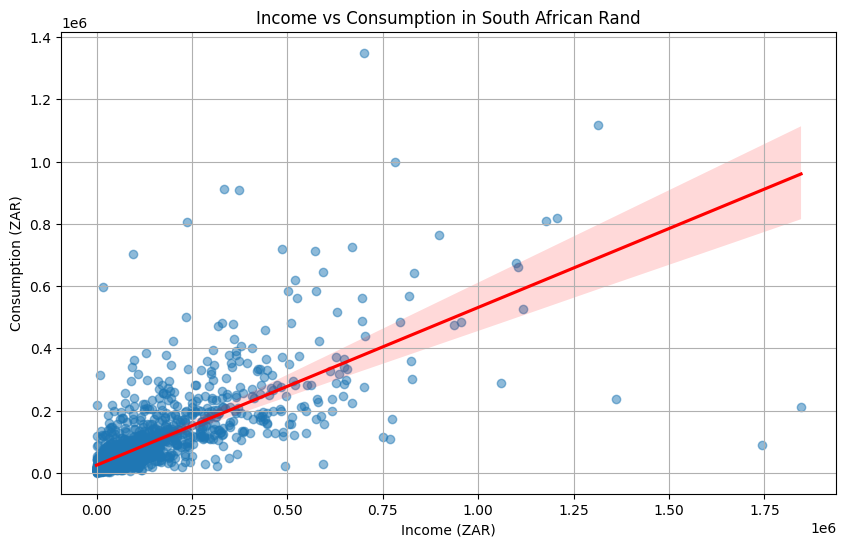

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_subset is your DataFrame containing 'Income' and 'Consumptions'
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Income', y='Consumptions', data=df_subset, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Income vs Consumption in South African Rand')
plt.xlabel('Income (ZAR)')
plt.ylabel('Consumption (ZAR)')
plt.grid()
plt.show()


In [ ]:
# I want to get the descriptive statistics for all variables
df_subset.describe()

,UQNO,SurveyYear,SurveyMonth,Income,Consumptions,Hsize,GenderOfHead,PopGrpOfHead_AfricanBlack,PopGrpOfHead_Coloured,PopGrpOfHead_IndianAsian
count,2.017000e+03,2017.0,2017.0,2.017000e+03,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,5.652545e+17,2011.0,6.0,1.040430e+05,7.748860e+04,3.791770,0.427863,0.814576,0.100149,0.014874
std,2.659767e+17,0.0,0.0,1.616466e+05,1.112552e+05,2.445289,0.494892,0.388737,0.300273,0.121077
min,1.020002e+17,2011.0,6.0,0.000000e+00,6.460000e+02,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.120001e+17,2011.0,6.0,2.094900e+04,2.163200e+04,2.000000,0.000000,1.000000,0.000000,0.000000
50%,5.720314e+17,2011.0,6.0,4.306200e+04,3.918500e+04,3.000000,0.000000,1.000000,0.000000,0.000000
75%,8.040003e+17,2011.0,6.0,1.135190e+05,8.568300e+04,5.000000,1.000000,1.000000,0.000000,0.000000
max,9.860101e+17,2011.0,6.0,1.845877e+06,1.349449e+06,17.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import statsmodels.api as sm
import numpy as np

# Log-transform Consumption
df_subset['log_Consumptions'] = np.log(df_subset['Consumptions'])

# Define the dependent variable as the log-transformed Consumption
y_log_consumption = df_subset['log_Consumptions']

# Define the independent variables (without log-transforming Income)
X = df_subset[['Income', 'Hsize', 'GenderOfHead', 'PopGrpOfHead_AfricanBlack',
               'PopGrpOfHead_Coloured', 'PopGrpOfHead_IndianAsian']]
X = sm.add_constant(X)  # Adding constant for the intercept

# Run the regression for log-transformed Consumption
model_log_consumption = sm.OLS(y_log_consumption, X).fit()

# Print the regression results
print(model_log_consumption.summary())


                            OLS Regression Results                            
Dep. Variable:       log_Consumptions   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     339.7
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          3.34e-301
Time:                        18:10:43   Log-Likelihood:                -2203.3
No. Observations:                2017   AIC:                             4421.
Df Residuals:                    2010   BIC:                             4460.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
import statsmodels.api as sm
import numpy as np

# Fit the original regression model
X = sm.add_constant(df_subset[['Income', 'Hsize', 'GenderOfHead', 'PopGrpOfHead_AfricanBlack', 'PopGrpOfHead_Coloured', 'PopGrpOfHead_IndianAsian']])
y = df_subset['log_Consumptions']
model = sm.OLS(y, X).fit()

# Get the fitted values (predicted values)
fitted_values = model.fittedvalues

# Create squared and cubic terms of the fitted values
df_subset['Fitted_Squared'] = fitted_values**2
df_subset['Fitted_Cubic'] = fitted_values**3

# Add these higher-order terms to the original model
X_reset = sm.add_constant(df_subset[['Income', 'Hsize', 'GenderOfHead', 'PopGrpOfHead_AfricanBlack',
                                     'PopGrpOfHead_Coloured', 'PopGrpOfHead_IndianAsian',
                                     'Fitted_Squared', 'Fitted_Cubic']])

# Run the auxiliary regression
reset_model = sm.OLS(y, X_reset).fit()

# Display the summary
print(reset_model.summary())


                            OLS Regression Results                            
Dep. Variable:       log_Consumptions   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     440.3
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:10:43   Log-Likelihood:                -1887.6
No. Observations:                2017   AIC:                             3793.
Df Residuals:                    2008   BIC:                             3844.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 